# Description

- Initialize with returns, predictions, target volatility, and oos start date
- Evaluate portfolios generated from the predictions

- TODO(gp): This should be called `Master_model_evaluator` like the class

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import logging

import core.config as cconfig
import dataflow.model.model_evaluator as dtfmomoeva
import dataflow.model.model_plotter as dtfmomoplo
import helpers.hdbg as hdbg
import helpers.hprint as hprint

/app/amp/dataflow/core/dag.py:15: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
hdbg.init_logger(verbosity=logging.INFO)
# hdbg.init_logger(verbosity=logging.DEBUG)

_LOG = logging.getLogger(__name__)

# _LOG.info("%s", env.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-d4f1f855-016a-4054-be38-710287312fd3.json'


# Notebook config

In [3]:
# Read from env var.
eval_config = cconfig.Config.from_env_var("AM_CONFIG_CODE")

# Override config.
if eval_config is None:
    # experiment_dir = "/cache/experiments/oos_experiment.RH1E.v2_0-top100.5T"
    # experiment_dir = "/app/rc_experiment.RH8Ec.v2_0-top2.5T.2009.run1"
    # experiment_dir = "/app/experiment.RH1E.kibot_v2-top2.5T"
    experiment_dir = "/app/experiment.RH1E.ccxt_v1-top2.5T.2018_2022"
    # experiment_dir = "/app/experiment.RH1E.kibot_v2-top20.5T"
    aws_profile = None
    selected_idxs = None

    eval_config = cconfig.Config.from_dict(
        {
            "load_experiment_kwargs": {
                "src_dir": experiment_dir,
                "file_name": "result_bundle.v2_0.pkl",
                "experiment_type": "ins_oos",
                "selected_idxs": selected_idxs,
                "aws_profile": aws_profile,
            },
            "model_evaluator_kwargs": {
                # "predictions_col": "mid_ret_0_vol_adj_clipped_2_hat",
                # "target_col": "mid_ret_0_vol_adj_clipped_2",
                "predictions_col": "ret_0_vol_adj_2_hat",
                "target_col": "ret_0_vol_adj_2",
                # "oos_start": "2017-01-01",
                "oos_start": None,
                "abort_on_error": True,
            },
            "bh_adj_threshold": 0.1,
            "resample_rule": "W",
            "mode": "ins",
            "target_volatility": 0.1,
        }
    )

print(str(eval_config))

WARNING Environment variable 'AM_CONFIG_CODE' not defined: no config retrieved
load_experiment_kwargs:
  src_dir: /app/experiment.RH1E.ccxt_v1-top2.5T.2018_2022
  file_name: result_bundle.v2_0.pkl
  experiment_type: ins_oos
  selected_idxs: None
  aws_profile: None
model_evaluator_kwargs:
  predictions_col: ret_0_vol_adj_2_hat
  target_col: ret_0_vol_adj_2
  oos_start: None
  abort_on_error: True
bh_adj_threshold: 0.1
resample_rule: W
mode: ins
target_volatility: 0.1


# Initialize ModelEvaluator and ModelPlotter

In [4]:
# Build the ModelEvaluator from the eval config.
evaluator = dtfmomoeva.ModelEvaluator.from_eval_config(eval_config)

# Build the ModelPlotter.
plotter = dtfmomoplo.ModelPlotter(evaluator)

INFO  Before load_experiment_artifacts: memory_usage=rss=0.301GB vms=2.870GB mem_pct=3%
INFO  # Load artifacts 'result_bundle.v2_0.pkl' from '/app/experiment.RH1E.ccxt_v1-top2.5T.2018_2022'
INFO  Found 2 experiment subdirs in '/app/experiment.RH1E.ccxt_v1-top2.5T.2018_2022'


Loading artifacts:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  load_experiment_artifacts: memory_usage=rss=0.343GB vms=3.496GB mem_pct=3%
INFO  load_experiment_artifacts: memory_usage=rss=0.352GB vms=3.504GB mem_pct=3%
INFO  After load_experiment_artifacts: memory_usage=rss=0.352GB vms=3.504GB mem_pct=3%
INFO  Before building ModelEvaluator: memory_usage=rss=0.352GB vms=3.504GB mem_pct=3%
INFO  After building ModelEvaluator: memory_usage=rss=0.358GB vms=3.510GB mem_pct=3%


# Analysis

In [5]:
pnl_stats = evaluator.calculate_stats(
    mode=eval_config["mode"], target_volatility=eval_config["target_volatility"]
)
display(pnl_stats)

Calculating positions:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.398GB vms=3.549GB mem_pct=3%


Calculating stats:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  stats=
avg_turnover_(%)           143.533932
turnover_frequency      <5 * Minutes>
avg_holding_period           0.696699
holding_period_units    <5 * Minutes>
Name: positions, dtype: object


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2015: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


INFO  stats=
avg_turnover_(%)           151.108831
turnover_frequency      <5 * Minutes>
avg_holding_period           0.661775
holding_period_units    <5 * Minutes>
Name: positions, dtype: object
INFO  memory_usage=rss=0.380GB vms=3.628GB mem_pct=3%


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2011: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


0                          1
portfolio    avg_turnover_(%)                                         143.533932                 151.108831
             turnover_frequency                                    <5 * Minutes>              <5 * Minutes>
             avg_holding_period                                         0.696699                   0.661775
             holding_period_units                                  <5 * Minutes>              <5 * Minutes>
ratios       sharpe_ratio                                               1.781133                   1.441202
             sharpe_ratio_standard_error                                0.535551                   0.849651
             sr.tval                                                    3.326076                   1.696323
             sr.pval                                                    0.000881                   0.089842
             kratio                                                     2.610733                   1.268196
sampling     start_time                                2019-01-15 10:20:00-05:00  2021-03-02 15:20:00-05:00
             end_time                                  2022-02-09 15:50:00-05:00  2022-02-09 15:50:00-05:00
             n_sampling_points                                             56650                      17719
             frequency                                             <5 * Minutes>              <5 * Minutes>
             sampling_points_per_year                                 105156.125                 105156.125
             time_span_in_years                                         3.070815                   0.942209
             n_rows                                                       366641                     145667
             frac_zero                                                  0.006156                   0.001181
             frac_nan                                                   0.845489                    0.87836
             frac_inf                                                        0.0                        0.0
             frac_constant                                              0.000412                   0.000034
             num_finite_samples                                            56650                      17719
             num_finite_samples_inv                                     0.000018                   0.000056
             num_finite_samples_inv_dyadic_scale                             -16                        -15
             num_finite_samples_sqrt                                  238.012605                 133.112734
             num_finite_samples_sqrt_inv                                0.004201                   0.007512
             num_finite_samples_sqrt_inv_dyadic_scale                         -8                         -8
             num_unique_values                                             54394                      17548
summary      scipy.mean                                                 0.000011                   0.000011
             scipy.std                                                  0.000784                   0.000884
             scipy.skew                                                 0.247449                   0.115654
             scipy.kurtosis                                           103.762631                 158.445509
             null_mean_zero.tval                                        3.326076                   1.696323
             null_mean_zero.pval                                        0.000881                   0.089842
             jensen_ratio                                                0.34411                   0.364232
             count                                                       56650.0                    17719.0
             mean                                                       0.000011                   0.000011
             std                                                        0.000784   

## Model selection

Calculating positions:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.396GB vms=3.644GB mem_pct=3%


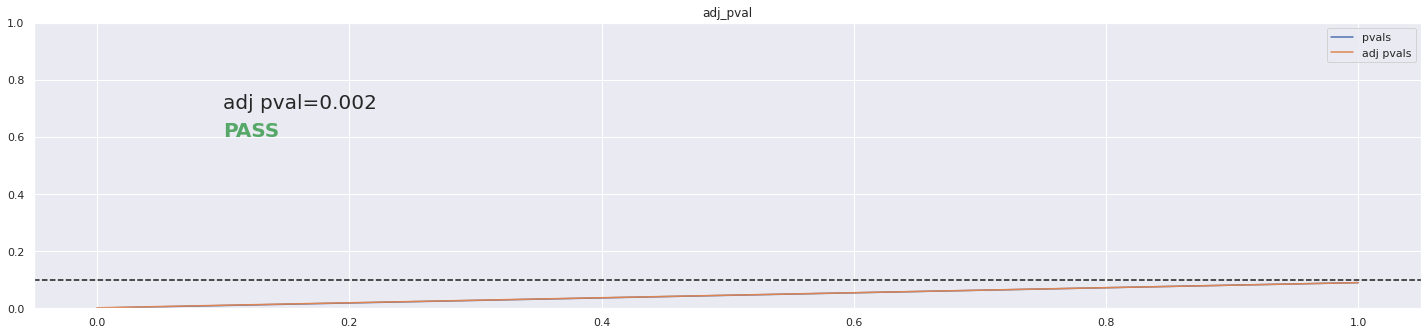

In [6]:
plotter.plot_multiple_tests_adjustment(
    threshold=eval_config["bh_adj_threshold"], mode=eval_config["mode"]
)

In [9]:
# TODO(gp): Move this chunk of code in a function.
col_mask = (
    pnl_stats.loc["ratios"].loc["sr.adj_pval"] < eval_config["bh_adj_threshold"]
)
selected = pnl_stats.loc[:, col_mask].columns.to_list()
not_selected = pnl_stats.loc[:, ~col_mask].columns.to_list()

print("num model selected=%s" % hprint.perc(len(selected), pnl_stats.shape[1]))
print("model selected=%s" % selected)
print("model not selected=%s" % not_selected)

# Use `selected = None` to show all the models.

num model selected=2 / 2 = 100.00%
model selected=[0, 1]
model not selected=[]


Calculating positions:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.387GB vms=3.635GB mem_pct=3%


Calculating positions:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.402GB vms=3.650GB mem_pct=3%
INFO  stats=
avg_turnover_(%)            144.81124
turnover_frequency      <5 * Minutes>
avg_holding_period           0.690554
holding_period_units    <5 * Minutes>
Name: positions, dtype: object
INFO  memory_usage=rss=0.422GB vms=3.669GB mem_pct=4%


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2015: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


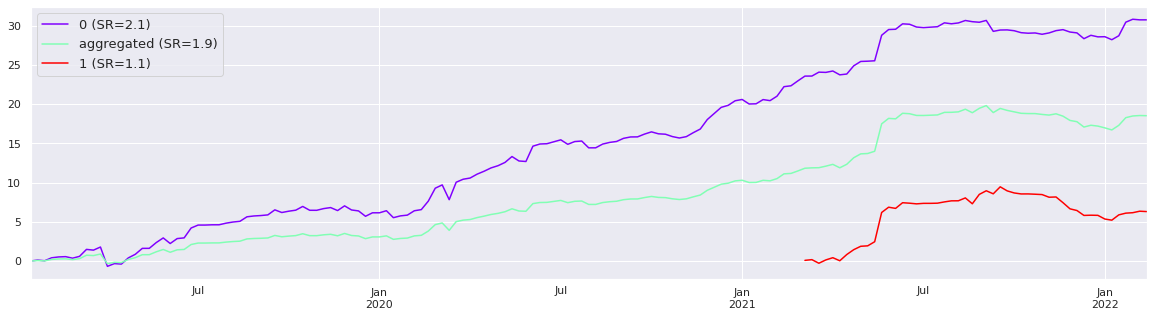

In [10]:
# selected = None
plotter.plot_multiple_pnls(
    keys=selected,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

## Return correlation

Calculating positions:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.383GB vms=3.632GB mem_pct=3%


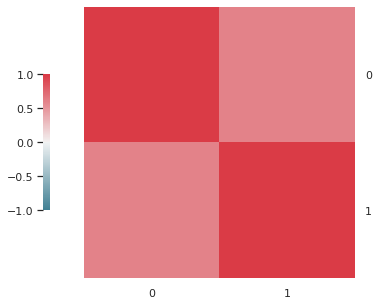

In [11]:
plotter.plot_correlation_matrix(
    series="returns",
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

In [ ]:
plotter.plot_effective_correlation_rank(
    series="returns",
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

## Model correlation

In [ ]:
plotter.plot_correlation_matrix(
    series="pnl",
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

In [ ]:
plotter.plot_effective_correlation_rank(
    series="pnl",
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

## Aggregate model

In [ ]:
pnl_srs, pos_srs, aggregate_stats = evaluator.aggregate_models(
    keys=selected,
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)
display(aggregate_stats)

In [ ]:
plotter.plot_sharpe_ratio_panel(keys=selected, mode=eval_config["mode"])

In [ ]:
plotter.plot_rets_signal_analysis(
    keys=selected,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

In [ ]:
plotter.plot_performance(
    keys=selected,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

In [ ]:
plotter.plot_rets_and_vol(
    keys=selected,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

In [ ]:
if False:
    plotter.plot_positions(
        keys=selected,
        mode=eval_config["mode"],
        target_volatility=eval_config["target_volatility"],
    )

In [ ]:
if False:
    # Plot the returns and prediction for one or more models.
    model_key = selected[:1]
    plotter.plot_returns_and_predictions(
        keys=model_key,
        resample_rule=eval_config["resample_rule"],
        mode=eval_config["mode"],
    )